https://debuggercafe.com/visualizing-filters-and-feature-maps-in-convolutional-neural-networks-using-pytorch/
https://habr.com/ru/company/joom/blog/445354/

In [1]:
from pathlib import Path
import os
import random

import cv2
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor, FasterRCNN

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device is:", device)

Device is: cuda


In [4]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Planes/Airplanes_Annotations.zip" -d "/content/"
!unzip "/content/drive/MyDrive/Colab Notebooks/Planes/Images.zip" -d "/content/"

Archive:  /content/drive/MyDrive/Colab Notebooks/Planes/Airplanes_Annotations.zip
   creating: /content/Airplanes_Annotations/
 extracting: /content/Airplanes_Annotations/airplane_095.csv  
  inflating: /content/Airplanes_Annotations/airplane_094.csv  
  inflating: /content/Airplanes_Annotations/airplane_093.csv  
  inflating: /content/Airplanes_Annotations/airplane_092.csv  
  inflating: /content/Airplanes_Annotations/airplane_091.csv  
  inflating: /content/Airplanes_Annotations/airplane_090.csv  
 extracting: /content/Airplanes_Annotations/airplane_089.csv  
 extracting: /content/Airplanes_Annotations/airplane_088.csv  
 extracting: /content/Airplanes_Annotations/airplane_087.csv  
 extracting: /content/Airplanes_Annotations/airplane_086.csv  
  inflating: /content/Airplanes_Annotations/airplane_085.csv  
 extracting: /content/Airplanes_Annotations/airplane_084.csv  
  inflating: /content/Airplanes_Annotations/airplane_083.csv  
  inflating: /content/Airplanes_Annotations/airplane_0

In [5]:
IMAGES_FOLDER = 'Images'
ANNOT_FOLDER = 'Airplanes_Annotations' 

In [6]:
def visualize(filename: str):
    img = cv2.imread(str(Path(IMAGES_FOLDER, filename + '.jpg')))
    annot = pd.read_csv(Path(ANNOT_FOLDER, filename + '.csv'))
    plt.imshow(img)
    for _, row in annot.iterrows():
        x1, y1, x2, y2 = map(int, row[0].split(' '))
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    plt.figure()
    plt.imshow(img)

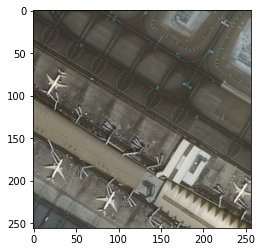

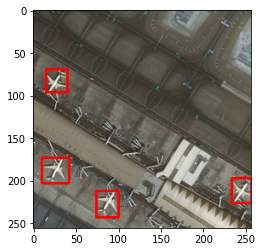

In [7]:
visualize('42845')

In [8]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(
    pretrained=True, progress=True, num_classes=91, pretrained_backbone=True
)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [9]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

Hooks for exploring layers outputs:

In [10]:
# def print_hook(self, input, output):
#     print('Inside ' + self.__class__.__name__ + ' forward')
#     print('')
#     print('input: ', type(input))
#     print('input[0]: ', type(input[0]))
#     print('output: ', type(output))
#     print('')
#     print('input size:', input[0].size())
#     print('output size:', output.data.size())
#     print('')

# def print_pool_hook(self, input, output):
#     print('Inside ' + self.__class__.__name__ + ' forward')
#     print('')
#     for d in [input, output]:
#         for i in d:
#             print(type(i))
#             for j in i:
#                 print('\t', type(j))
#                 if type(j) == str:
#                     print(j)
#                 elif type(j) == torch.Tensor:
#                     print(j.size())
#         print('')

# def _hook_last_conv(self, input, output):
#     print('model.backbone.body.layer4[2].conv3')
#     print_hook(self, input, output)

# def _hook_fpn11(self, input, output):
#     print('model.backbone.fpn.inner_blocks[0]')
#     print_hook(self, input, output)

# def _hook_fpn12(self, input, output):
#     print('model.backbone.fpn.inner_blocks[1]')
#     print_hook(self, input, output)

# def _hook_fpn13(self, input, output):
#     print('model.backbone.fpn.inner_blocks[2]')
#     print_hook(self, input, output)

# def _hook_fpn14(self, input, output):
#     print('model.backbone.fpn.inner_blocks[3]')
#     print_hook(self, input, output)

# def _hook_fpn21(self, input, output):
#     print('model.backbone.fpn.layer_blocks[0]')
#     print_hook(self, input, output)

# def _hook_fpn22(self, input, output):
#     print('model.backbone.fpn.layer_blocks[1]')
#     print_hook(self, input, output)

# def _hook_fpn23(self, input, output):
#     print('model.backbone.fpn.layer_blocks[2]')
#     print_hook(self, input, output)

# def _hook_fpn24(self, input, output):
#     print('model.backbone.fpn.layer_blocks[3]')
#     print_hook(self, input, output)

In [11]:
# hook_last_conv = model.backbone.body.layer4[2].conv3.register_forward_hook(_hook_last_conv)

# hook_fpn11 = model.backbone.fpn.inner_blocks[0].register_forward_hook(_hook_fpn11)
# hook_fpn12 = model.backbone.fpn.inner_blocks[1].register_forward_hook(_hook_fpn12)
# hook_fpn13 = model.backbone.fpn.inner_blocks[2].register_forward_hook(_hook_fpn13)
# hook_fpn14 = model.backbone.fpn.inner_blocks[3].register_forward_hook(_hook_fpn14)

# hook_fpn21 = model.backbone.fpn.layer_blocks[0].register_forward_hook(_hook_fpn21)
# hook_fpn22 = model.backbone.fpn.layer_blocks[1].register_forward_hook(_hook_fpn22)
# hook_fpn23 = model.backbone.fpn.layer_blocks[2].register_forward_hook(_hook_fpn23)
# hook_fpn24 = model.backbone.fpn.layer_blocks[3].register_forward_hook(_hook_fpn24)

# # hook.remove()

In [12]:
# Getting output of FPN (last maxpool layer)

fpn_output = None

def get_output_from_fpn(self, input, output):
    global fpn_output
    fpn_output = output[0]

hook_pool = model.backbone.fpn.extra_blocks.register_forward_hook(get_output_from_fpn)

In [13]:
# EXAMPLE INFERENCE

to_tensor = transforms.ToTensor()

def val_transform(img):
    img_tensor = to_tensor(img)
    return img_tensor.unsqueeze(0)

img_tensor = val_transform(Image.open(Path(IMAGES_FOLDER, '42845.jpg')))
img_tensor.shape

torch.Size([1, 3, 256, 256])

In [14]:
model.to(device)
model.eval()
with torch.no_grad():
    predictions = model(img_tensor.to(device))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [15]:
for output_tensor in fpn_output:
    print(output_tensor.size())
    torch.save(output_tensor, f'/content/drive/MyDrive/Colab Notebooks/Planes/output_tensor_{tuple(output_tensor.size())}.pt')

torch.save(fpn_output, f'/content/drive/MyDrive/Colab Notebooks/Planes/output_tensors.pt')

torch.Size([1, 256, 200, 200])
torch.Size([1, 256, 100, 100])
torch.Size([1, 256, 50, 50])
torch.Size([1, 256, 25, 25])
torch.Size([1, 256, 13, 13])


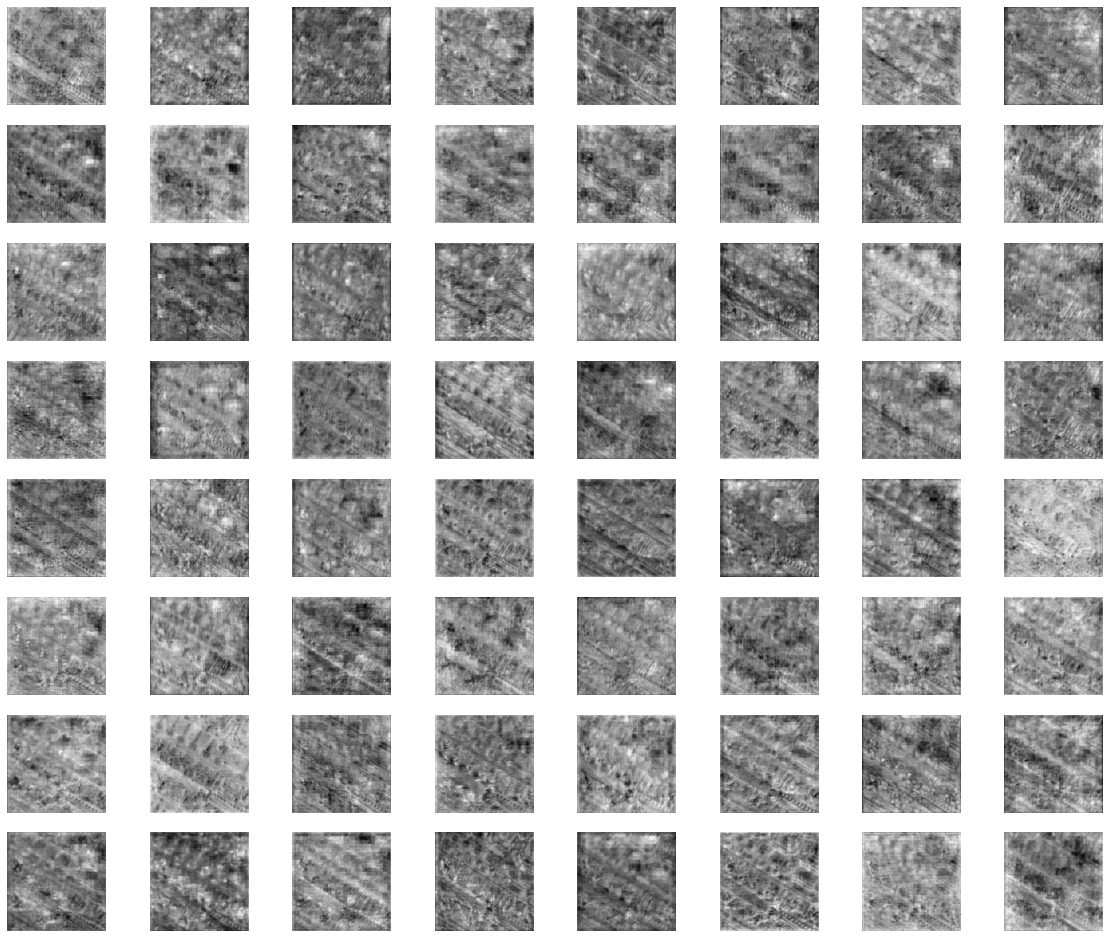

In [18]:
plt.figure(figsize=(20, 17))

# visualize first 64 maps from 1st (largest) FPN output tensor
for i, fmap in enumerate(fpn_output[0].squeeze(0)[:64]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(fmap.detach().cpu(), cmap='gray')
    plt.axis('off')
plt.show()

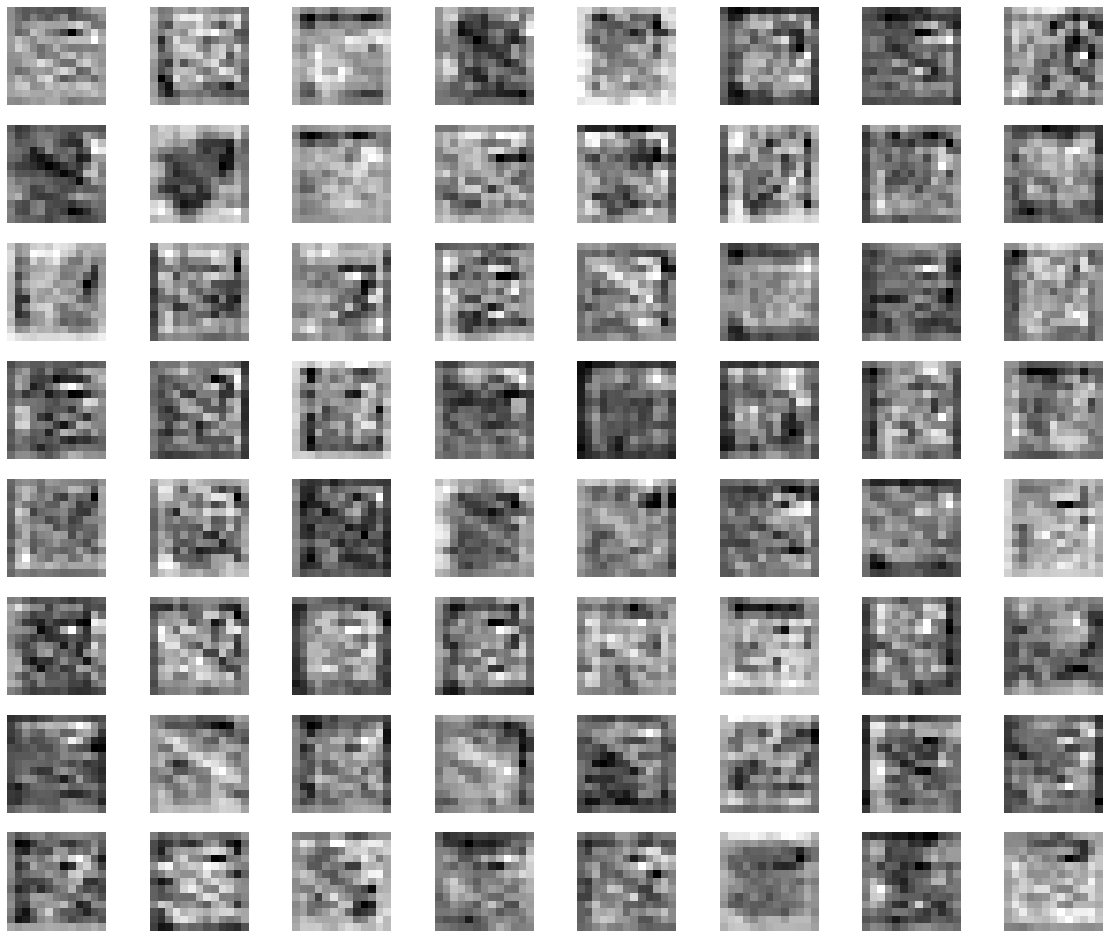

In [19]:
plt.figure(figsize=(20, 17))

# visualize first 64 maps from last (smallest) FPN output tensor
for i, fmap in enumerate(fpn_output[-1].squeeze(0)[:64]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(fmap.detach().cpu(), cmap='gray')
    plt.axis('off')
plt.show()